In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# ============================================================================
# PART 1: DATA GENERATION AND LOADING
# ============================================================================

# Generate the dataset
print("1. Generating Sales Dataset...")
df = pd.read_csv("/content/sample_data/sales_data.csv")
print(f"Dataset created with {len(df)} records and {len(df.columns)} columns")
print("\nDataset Info:")
print(df.info())

1. Generating Sales Dataset...
Dataset created with 1000 records and 14 columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 no

In [3]:
# ============================================================================
# PART 2: DATA PREPROCESSING AND EXPLORATION
# ============================================================================

print("\n" + "="*50)
print("PART 2: DATA PREPROCESSING AND EXPLORATION")
print("="*50)

# Basic statistics
print("\n2.1 Basic Dataset Statistics:")
print(df.describe())

# Check for missing values
print("\n2.2 Missing Values Check:")
print(df.isnull().sum())

# Data type conversions
print("\n2.3 Data Type Conversions:")
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month
df['Quarter'] = df['Sale_Date'].dt.quarter
df['Weekday'] = df['Sale_Date'].dt.dayofweek

# Calculate additional metrics
df['Profit'] = df['Sales_Amount'] - (df['Unit_Cost'] * df['Quantity_Sold'])
df['Profit_Margin'] = df['Profit'] / df['Sales_Amount']
df['Revenue_Per_Unit'] = df['Sales_Amount'] / df['Quantity_Sold']

print("New features created: Year, Month, Quarter, Weekday, Profit, Profit_Margin, Revenue_Per_Unit")


PART 2: DATA PREPROCESSING AND EXPLORATION

2.1 Basic Dataset Statistics:
        Product_ID  Sales_Amount  Quantity_Sold    Unit_Cost   Unit_Price  \
count  1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean   1050.128000   5019.265230      25.355000  2475.304550  2728.440120   
std      29.573505   2846.790126      14.159006  1417.872546  1419.399839   
min    1001.000000    100.120000       1.000000    60.280000   167.120000   
25%    1024.000000   2550.297500      13.000000  1238.380000  1509.085000   
50%    1051.000000   5019.300000      25.000000  2467.235000  2696.400000   
75%    1075.000000   7507.445000      38.000000  3702.865000  3957.970000   
max    1100.000000   9989.040000      49.000000  4995.300000  5442.150000   

         Discount  
count  1000.00000  
mean      0.15239  
std       0.08720  
min       0.00000  
25%       0.08000  
50%       0.15000  
75%       0.23000  
max       0.30000  

2.2 Missing Values Check:
Product_ID              


PART 3: EXPLORATORY DATA ANALYSIS


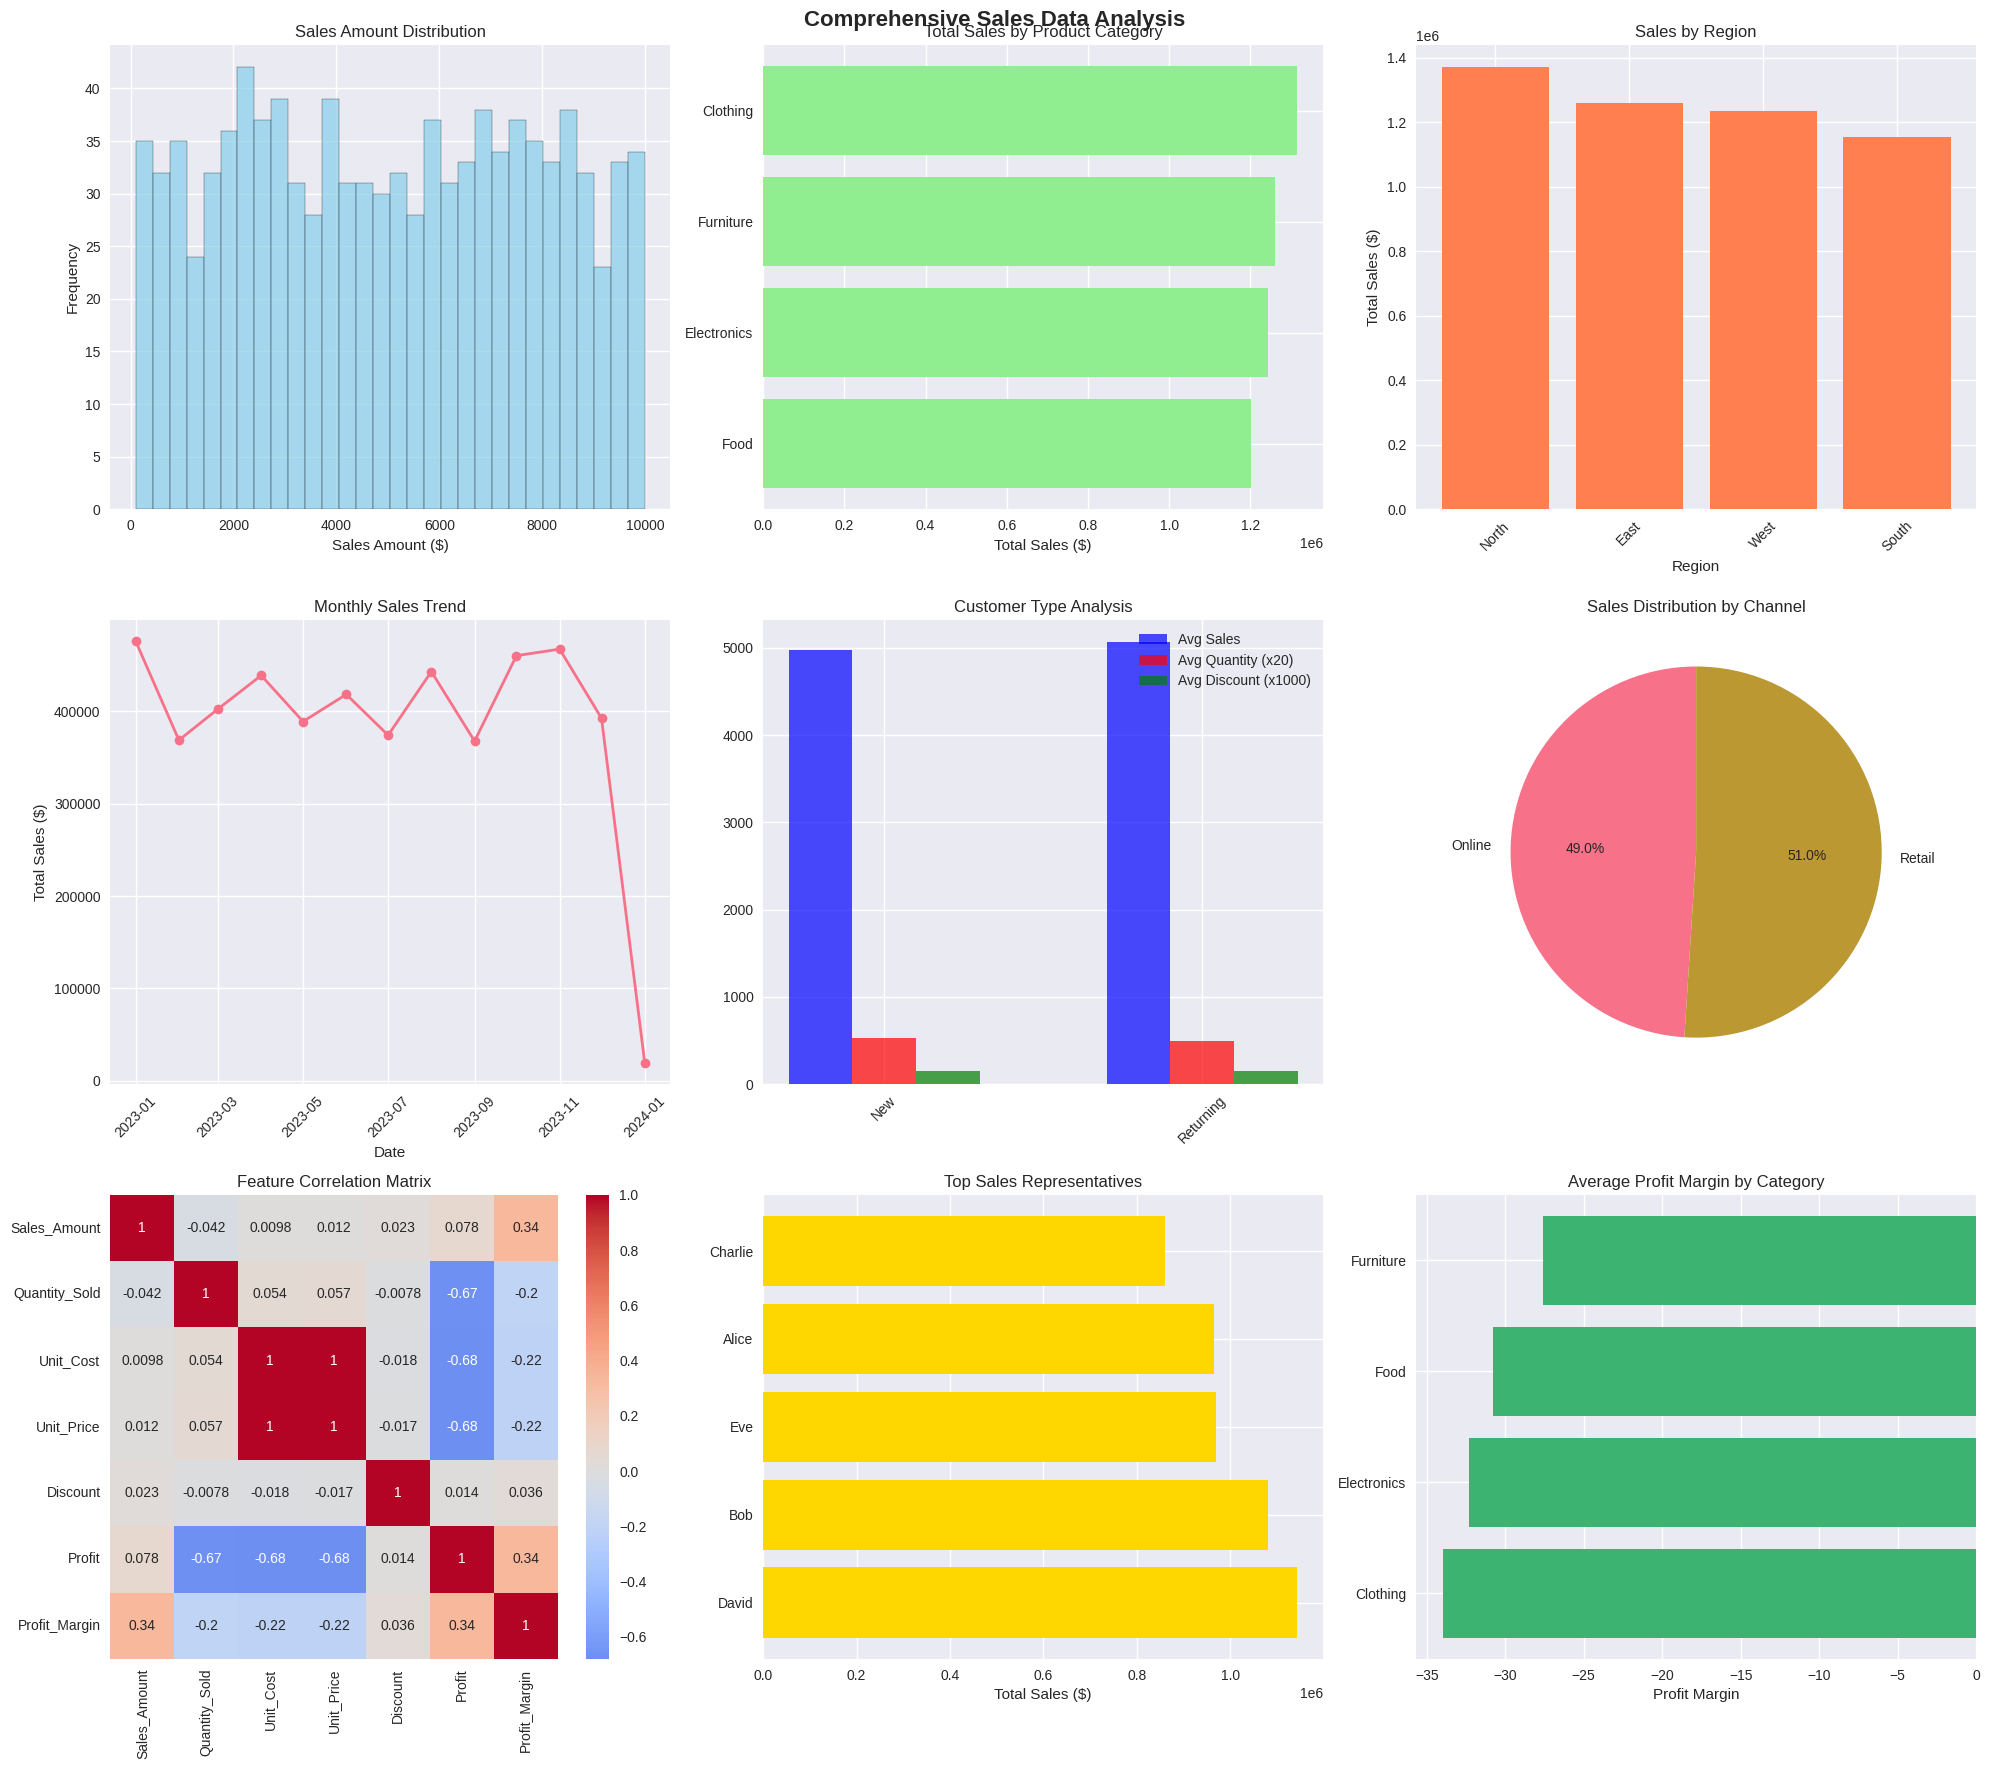


3.1 Key Insights from EDA:
• Total Revenue: $5,019,265.23
• Average Order Value: $5019.27
• Total Profit: $-58,822,828.41
• Average Profit Margin: -3116.80%
• Best Performing Region: North ($1,369,612.51)
• Top Product Category: Clothing ($1,313,474.36)


In [4]:
# ============================================================================
# PART 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*50)
print("PART 3: EXPLORATORY DATA ANALYSIS")
print("="*50)

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Comprehensive Sales Data Analysis', fontsize=16, fontweight='bold')

# 1. Sales Amount Distribution
axes[0,0].hist(df['Sales_Amount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Sales Amount Distribution')
axes[0,0].set_xlabel('Sales Amount ($)')
axes[0,0].set_ylabel('Frequency')

# 2. Sales by Product Category
category_sales = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=True)
axes[0,1].barh(category_sales.index, category_sales.values, color='lightgreen')
axes[0,1].set_title('Total Sales by Product Category')
axes[0,1].set_xlabel('Total Sales ($)')

# 3. Sales by Region
region_sales = df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)
axes[0,2].bar(region_sales.index, region_sales.values, color='coral')
axes[0,2].set_title('Sales by Region')
axes[0,2].set_xlabel('Region')
axes[0,2].set_ylabel('Total Sales ($)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Sales Trend Over Time
monthly_sales = df.groupby(['Year', 'Month'])['Sales_Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))
axes[1,0].plot(monthly_sales['Date'], monthly_sales['Sales_Amount'], marker='o', linewidth=2)
axes[1,0].set_title('Monthly Sales Trend')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Total Sales ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Customer Type Analysis
customer_analysis = df.groupby('Customer_Type').agg({
    'Sales_Amount': 'mean',
    'Quantity_Sold': 'mean',
    'Discount': 'mean'
}).round(2)

x_pos = range(len(customer_analysis))
axes[1,1].bar([x-0.2 for x in x_pos], customer_analysis['Sales_Amount'],
              width=0.2, label='Avg Sales', color='blue', alpha=0.7)
axes[1,1].bar([x for x in x_pos], customer_analysis['Quantity_Sold']*20,
              width=0.2, label='Avg Quantity (x20)', color='red', alpha=0.7)
axes[1,1].bar([x+0.2 for x in x_pos], customer_analysis['Discount']*1000,
              width=0.2, label='Avg Discount (x1000)', color='green', alpha=0.7)
axes[1,1].set_title('Customer Type Analysis')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(customer_analysis.index, rotation=45)
axes[1,1].legend()

# 6. Sales Channel Performance
channel_perf = df.groupby('Sales_Channel')['Sales_Amount'].agg(['sum', 'count', 'mean']).round(2)
axes[1,2].pie(channel_perf['sum'], labels=channel_perf.index, autopct='%1.1f%%', startangle=90)
axes[1,2].set_title('Sales Distribution by Channel')

# 7. Correlation Heatmap
numeric_cols = ['Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount', 'Profit', 'Profit_Margin']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[2,0])
axes[2,0].set_title('Feature Correlation Matrix')

# 8. Top Sales Representatives
top_reps = df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False).head(6)
axes[2,1].barh(range(len(top_reps)), top_reps.values, color='gold')
axes[2,1].set_yticks(range(len(top_reps)))
axes[2,1].set_yticklabels(top_reps.index)
axes[2,1].set_title('Top Sales Representatives')
axes[2,1].set_xlabel('Total Sales ($)')

# 9. Profit Analysis
profit_by_category = df.groupby('Product_Category')['Profit_Margin'].mean().sort_values(ascending=True)
axes[2,2].barh(profit_by_category.index, profit_by_category.values, color='mediumseagreen')
axes[2,2].set_title('Average Profit Margin by Category')
axes[2,2].set_xlabel('Profit Margin')

plt.tight_layout()
plt.show()

# Print key insights
print("\n3.1 Key Insights from EDA:")
print(f"• Total Revenue: ${df['Sales_Amount'].sum():,.2f}")
print(f"• Average Order Value: ${df['Sales_Amount'].mean():.2f}")
print(f"• Total Profit: ${df['Profit'].sum():,.2f}")
print(f"• Average Profit Margin: {df['Profit_Margin'].mean():.2%}")
print(f"• Best Performing Region: {region_sales.index[0]} (${region_sales.iloc[0]:,.2f})")
print(f"• Top Product Category: {category_sales.index[-1]} (${category_sales.iloc[-1]:,.2f})")

In [5]:
# ============================================================================
# PART 4: FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*50)
print("PART 4: FEATURE ENGINEERING")
print("="*50)

# Create additional features
print("4.1 Creating Advanced Features...")

# Price categories
df['Price_Category'] = pd.cut(df['Unit_Price'],
                             bins=[0, 50, 100, 200, float('inf')],
                             labels=['Low', 'Medium', 'High', 'Premium'])

# Sales performance categories
df['Sales_Performance'] = pd.cut(df['Sales_Amount'],
                                bins=[0, 100, 300, 600, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Excellent'])

# Seasonal analysis
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                               3: 'Spring', 4: 'Spring', 5: 'Spring',
                               6: 'Summer', 7: 'Summer', 8: 'Summer',
                               9: 'Fall', 10: 'Fall', 11: 'Fall'})

# High value customer flag
df['High_Value_Sale'] = (df['Sales_Amount'] > df['Sales_Amount'].quantile(0.75)).astype(int)

# Discount categories
df['Discount_Level'] = pd.cut(df['Discount'],
                             bins=[0, 0.05, 0.15, 0.25, 1.0],
                             labels=['No_Discount', 'Low_Discount', 'Medium_Discount', 'High_Discount'])

print("Features created: Price_Category, Sales_Performance, Season, High_Value_Sale, Discount_Level")


PART 4: FEATURE ENGINEERING
4.1 Creating Advanced Features...
Features created: Price_Category, Sales_Performance, Season, High_Value_Sale, Discount_Level



PART 5: REGRESSION ANALYSIS
5.1 Predicting Sales Amount...
Number of features for regression: 5

5.2 Linear Regression Results:
Linear Regression - MSE: 9397403.39, R²: -0.017

5.3 Random Forest Regression Results:
Random Forest - MSE: 10579179.22, R²: -0.145

5.4 Top 10 Most Important Features:
         feature  importance
0     Unit_Price    0.324182
1  Quantity_Sold    0.226103
2       Discount    0.202441
3          Month    0.141769
4        Weekday    0.105505


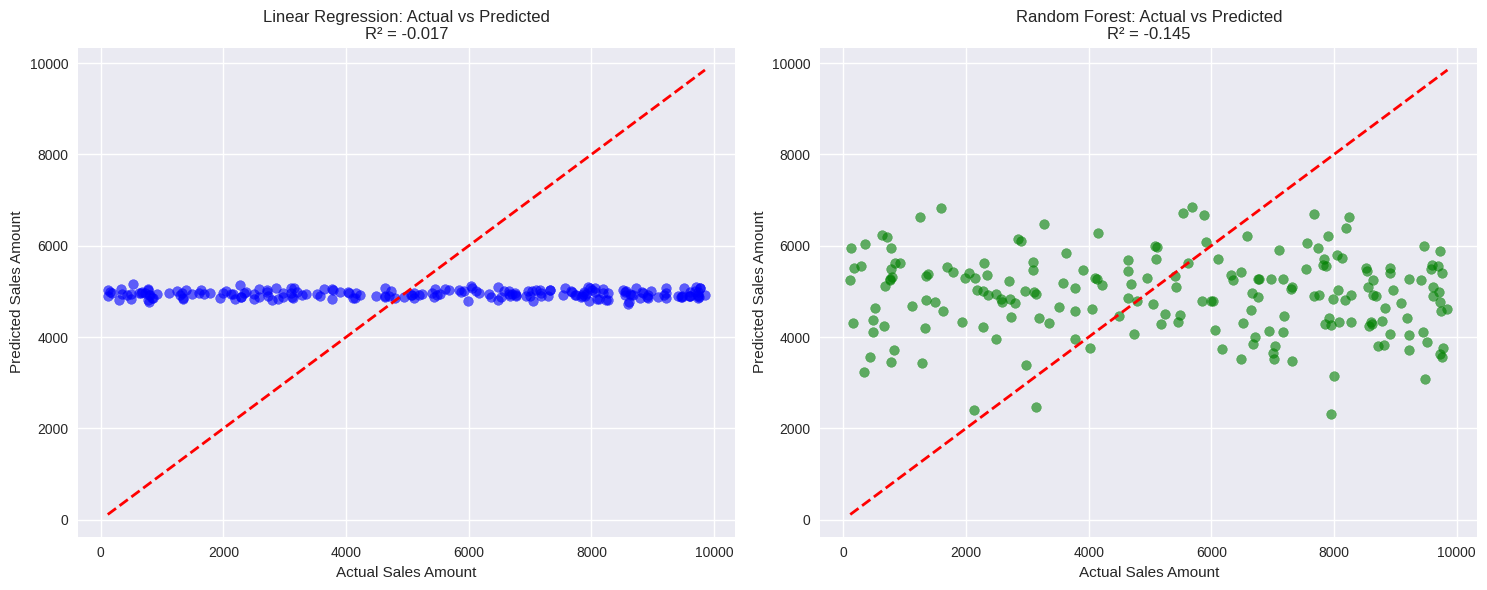

In [6]:
# ============================================================================
# PART 5: REGRESSION ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("PART 5: REGRESSION ANALYSIS")
print("="*50)

print("5.1 Predicting Sales Amount...")

# Prepare data for regression
# Create dummy variables for categorical features
categorical_features = ['Product_Category', 'Region', 'Customer_Type', 'Payment_Method',
                       'Sales_Channel', 'Season', 'Price_Category']

regression_df = df.copy()

# Create dummy variables and drop original categorical columns
for feature in categorical_features:
    if feature in regression_df.columns:
        dummies = pd.get_dummies(regression_df[feature], prefix=feature, drop_first=True)
        regression_df = pd.concat([regression_df, dummies], axis=1)
        regression_df = regression_df.drop(feature, axis=1)

# Select features for regression (only numeric features)
base_features = ['Unit_Price', 'Quantity_Sold', 'Discount', 'Month', 'Weekday']
dummy_features = [col for col in regression_df.columns if any(cat + '_' in col for cat in categorical_features)]

feature_columns = base_features + dummy_features
X = regression_df[feature_columns].select_dtypes(include=[np.number])
y = regression_df['Sales_Amount']

print(f"Number of features for regression: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
print("\n5.2 Linear Regression Results:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.3f}")

# Random Forest Regression
print("\n5.3 Random Forest Regression Results:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.3f}")

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n5.4 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs Predicted - Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sales Amount')
axes[0].set_ylabel('Predicted Sales Amount')
axes[0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {lr_r2:.3f}')

# Actual vs Predicted - Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sales Amount')
axes[1].set_ylabel('Predicted Sales Amount')
axes[1].set_title(f'Random Forest: Actual vs Predicted\nR² = {rf_r2:.3f}')

plt.tight_layout()
plt.show()



PART 6: CLASSIFICATION ANALYSIS
6.1 Predicting High Value Sales...
Number of features for classification: 5
Class distribution: {0: 750, 1: 250}

6.2 Logistic Regression Results:
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       150
           1       0.00      0.00      0.00        50

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.56      0.75      0.64       200


6.3 Random Forest Classification Results:
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       150
           1       0.38      0.06      0.10        50

    accuracy                           0.74       200
   macro avg       0.57      0.51      0.48       200
weighted avg       0.66      0.74      0.66       200



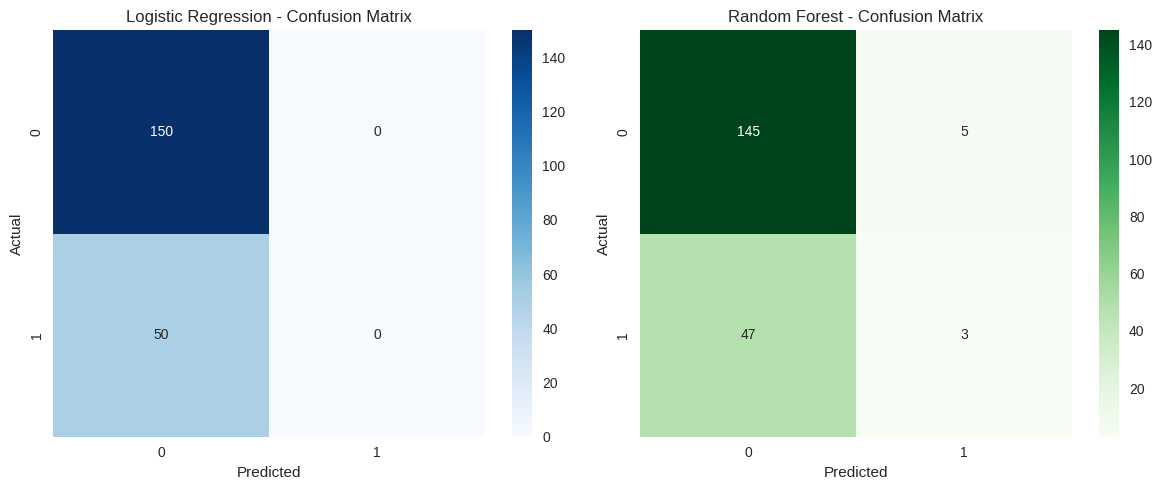

In [7]:
# ============================================================================
# PART 6: CLASSIFICATION ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("PART 6: CLASSIFICATION ANALYSIS")
print("="*50)

print("6.1 Predicting High Value Sales...")

# Prepare data for classification using the same processed features
X_class = X  # Use same features as regression
y_class = regression_df['High_Value_Sale']

print(f"Number of features for classification: {X_class.shape[1]}")
print(f"Class distribution: {y_class.value_counts().to_dict()}")

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Logistic Regression
print("\n6.2 Logistic Regression Results:")
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_class, y_train_class)
y_pred_log = log_model.predict(X_test_class)

print("Classification Report - Logistic Regression:")
print(classification_report(y_test_class, y_pred_log))

# Random Forest Classification
print("\n6.3 Random Forest Classification Results:")
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_model.fit(X_train_class, y_train_class)
y_pred_rf_class = rf_class_model.predict(X_test_class)

print("Classification Report - Random Forest:")
print(classification_report(y_test_class, y_pred_rf_class))

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test_class, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test_class, y_pred_rf_class)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


PART 7: CLUSTERING ANALYSIS
7.1 Customer Segmentation using K-Means...


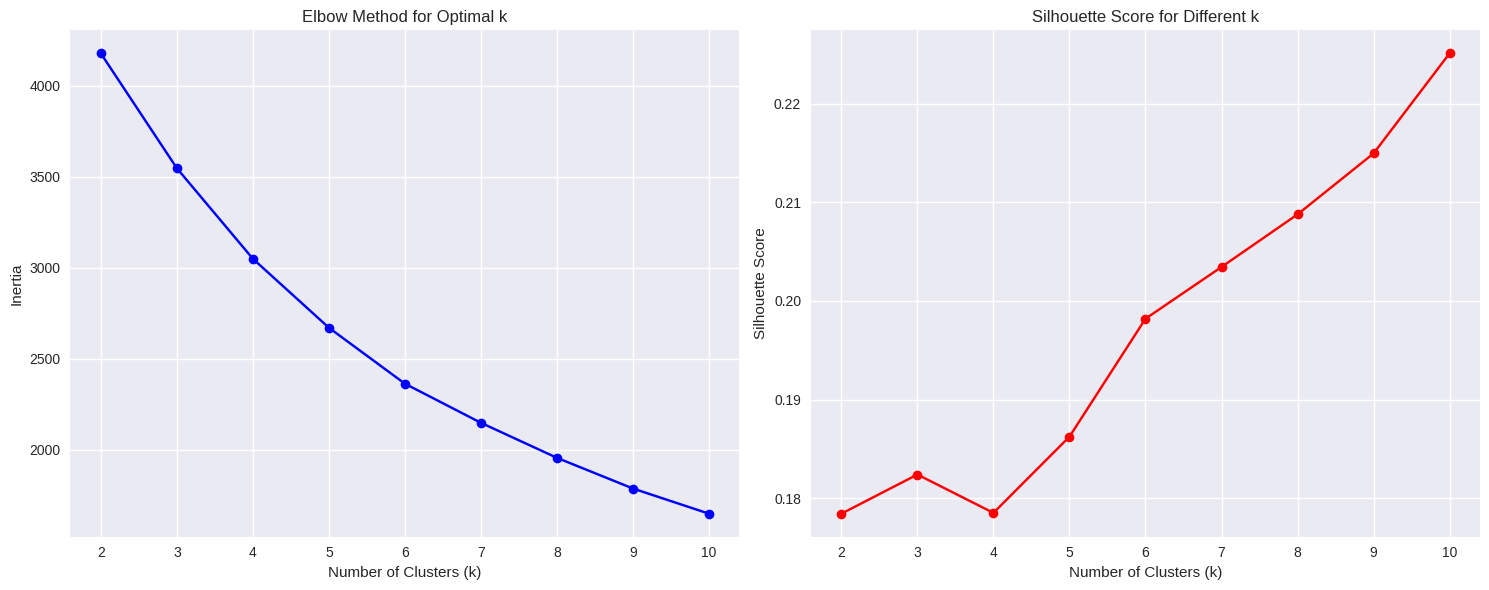


7.2 Optimal number of clusters: 10
Silhouette Score: 0.225

7.3 Cluster Analysis:
         Sales_Amount  Quantity_Sold  Unit_Price  Discount  Profit_Margin
Cluster                                                                  
0             6902.19          35.80     1789.06      0.23          -7.70
1              370.71          30.62     3773.23      0.15        -317.98
2             2577.56          11.95     3011.96      0.08         -18.84
3              146.96          44.00     4944.13      0.09       -1496.61
4             7563.26          15.05     1604.99      0.10          -1.59
5             6563.89          32.04     4061.71      0.06         -22.09
6             3786.05          38.05     3962.38      0.22         -49.86
7             3164.29          39.32     1655.42      0.09         -29.04
8             2717.21          14.36     1451.76      0.23         -11.21
9             7159.30          13.65     3798.17      0.23          -6.38

7.4 Cluster Sizes:
Cluster 0

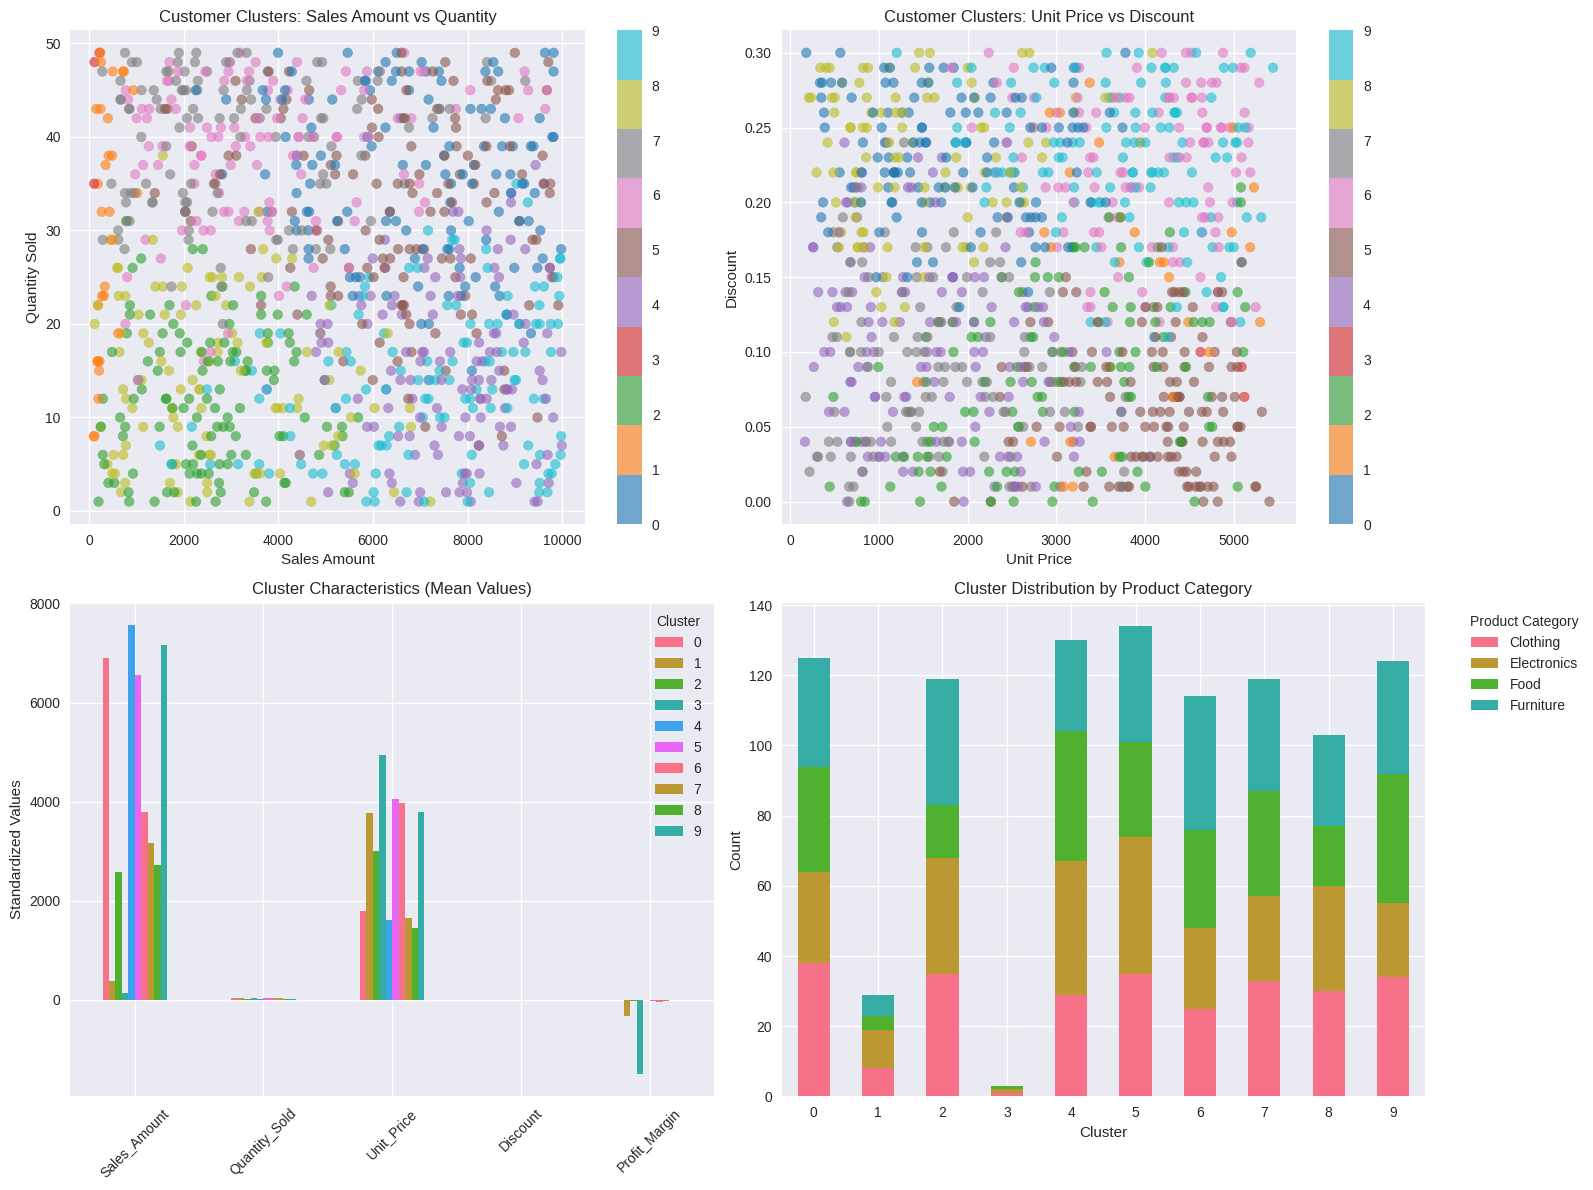

In [8]:
# ============================================================================
# PART 7: CLUSTERING ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("PART 7: CLUSTERING ANALYSIS")
print("="*50)

print("7.1 Customer Segmentation using K-Means...")

# Prepare data for clustering
cluster_features = ['Sales_Amount', 'Quantity_Sold', 'Unit_Price', 'Discount', 'Profit_Margin']
cluster_data = df[cluster_features].copy()

# Standardize the features
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_data_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k')

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different k')

plt.tight_layout()
plt.show()

# Choose optimal k (based on silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n7.2 Optimal number of clusters: {optimal_k}")

# Apply K-Means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_data_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"Silhouette Score: {silhouette_score(cluster_data_scaled, cluster_labels):.3f}")

# Analyze clusters
print("\n7.3 Cluster Analysis:")
cluster_analysis = df.groupby('Cluster')[cluster_features].mean().round(2)
print(cluster_analysis)

# Cluster size
cluster_sizes = df['Cluster'].value_counts().sort_index()
print(f"\n7.4 Cluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers ({size/len(df)*100:.1f}%)")

# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Cluster visualization - Sales Amount vs Quantity
scatter = axes[0,0].scatter(df['Sales_Amount'], df['Quantity_Sold'],
                           c=df['Cluster'], cmap='tab10', alpha=0.6)
axes[0,0].set_xlabel('Sales Amount')
axes[0,0].set_ylabel('Quantity Sold')
axes[0,0].set_title('Customer Clusters: Sales Amount vs Quantity')
plt.colorbar(scatter, ax=axes[0,0])

# Cluster visualization - Unit Price vs Discount
scatter = axes[0,1].scatter(df['Unit_Price'], df['Discount'],
                           c=df['Cluster'], cmap='tab10', alpha=0.6)
axes[0,1].set_xlabel('Unit Price')
axes[0,1].set_ylabel('Discount')
axes[0,1].set_title('Customer Clusters: Unit Price vs Discount')
plt.colorbar(scatter, ax=axes[0,1])

# Cluster characteristics
cluster_means = df.groupby('Cluster')[cluster_features].mean()
cluster_means.T.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Cluster Characteristics (Mean Values)')
axes[1,0].set_ylabel('Standardized Values')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Cluster')

# Cluster distribution by product category
cluster_category = pd.crosstab(df['Cluster'], df['Product_Category'])
cluster_category.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Cluster Distribution by Product Category')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].legend(title='Product Category', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


PART 8: ASSOCIATION RULE MINING
8.1 Generating Association Rules...
8.2 Created basket with 1000 transactions and 19 items
Found 131 frequent itemsets

8.3 Top 10 Association Rules:
Rule: Season_Summer => Price_Category_Premium, Payment_Method_Credit Card
Support: 0.104, Confidence: 0.411, Lift: 1.195
----------------------------------------------------------------------------------------------------
Rule: Price_Category_Premium, Payment_Method_Credit Card => Season_Summer
Support: 0.104, Confidence: 0.302, Lift: 1.195
----------------------------------------------------------------------------------------------------
Rule: Season_Summer => Payment_Method_Credit Card
Support: 0.104, Confidence: 0.411, Lift: 1.191
----------------------------------------------------------------------------------------------------
Rule: Season_Summer, Price_Category_Premium => Payment_Method_Credit Card
Support: 0.104, Confidence: 0.411, Lift: 1.191
------------------------------------------------------

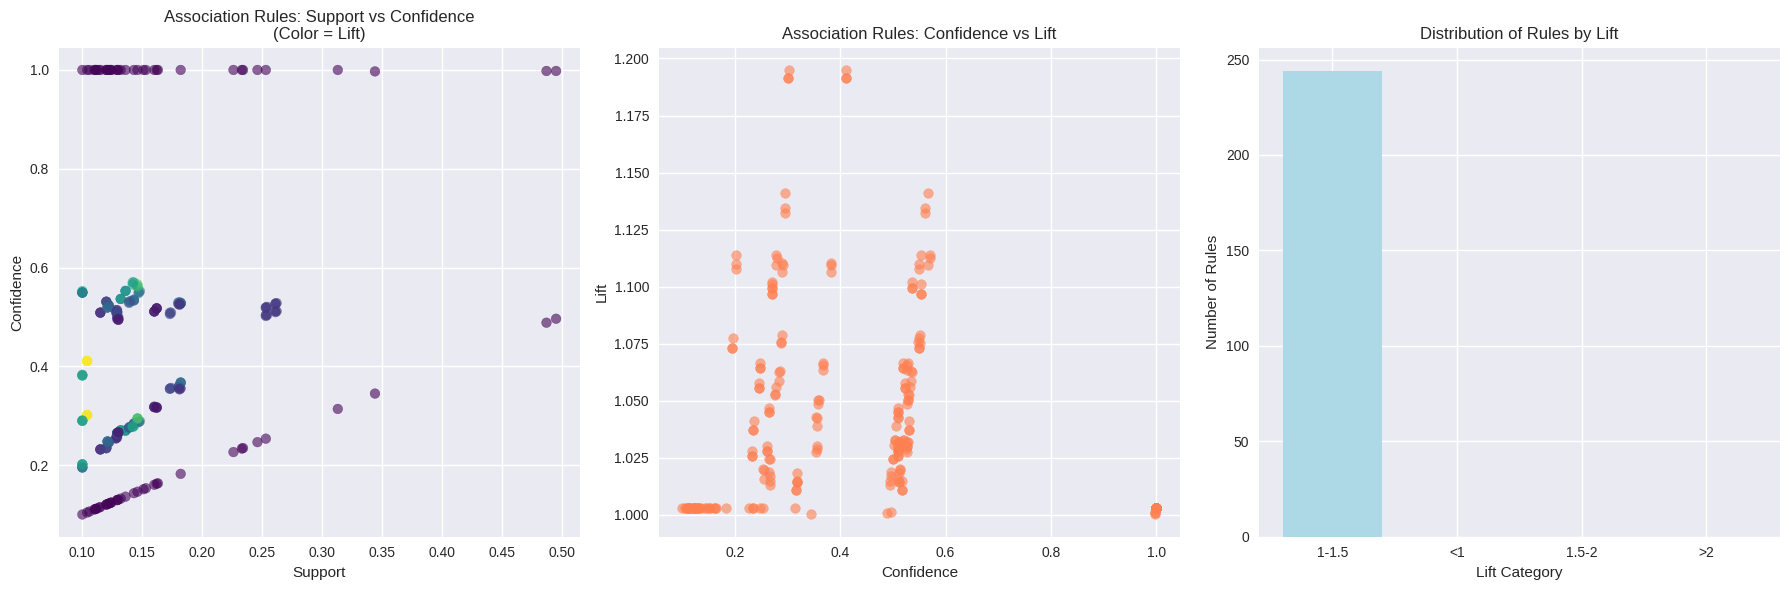

In [9]:
# ============================================================================
# PART 8: ASSOCIATION RULE MINING
# ============================================================================

print("\n" + "="*50)
print("PART 8: ASSOCIATION RULE MINING")
print("="*50)

print("8.1 Generating Association Rules...")

# Prepare data for association rule mining
# Create binary matrix for market basket analysis
basket_features = ['Product_Category', 'Customer_Type', 'Payment_Method',
                  'Sales_Channel', 'Price_Category', 'Season']

# Create a transaction-like dataset
transaction_data = df[basket_features + ['Product_ID']].copy()

# Create binary encoding for each combination
basket_df = pd.get_dummies(transaction_data[basket_features])

print(f"8.2 Created basket with {len(basket_df)} transactions and {len(basket_df.columns)} items")

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_df, min_support=0.1, use_colnames=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets")

# Generate association rules
if len(frequent_itemsets) > 0:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    if len(rules) > 0:
        # Sort by lift and confidence
        rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

        print("\n8.3 Top 10 Association Rules:")
        print("=" * 100)
        for idx, rule in rules_sorted.head(10).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"Rule: {antecedent} => {consequent}")
            print(f"Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
            print("-" * 100)

        # Visualize association rules
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Support vs Confidence
        axes[0].scatter(rules['support'], rules['confidence'],
                       c=rules['lift'], cmap='viridis', alpha=0.6)
        axes[0].set_xlabel('Support')
        axes[0].set_ylabel('Confidence')
        axes[0].set_title('Association Rules: Support vs Confidence\n(Color = Lift)')

        # Confidence vs Lift
        axes[1].scatter(rules['confidence'], rules['lift'], alpha=0.6, color='coral')
        axes[1].set_xlabel('Confidence')
        axes[1].set_ylabel('Lift')
        axes[1].set_title('Association Rules: Confidence vs Lift')

        # Rules distribution
        lift_bins = [0, 1, 1.5, 2, float('inf')]
        lift_labels = ['<1', '1-1.5', '1.5-2', '>2']
        rules['Lift_Category'] = pd.cut(rules['lift'], bins=lift_bins, labels=lift_labels)
        lift_counts = rules['Lift_Category'].value_counts()

        axes[2].bar(lift_counts.index, lift_counts.values, color='lightblue')
        axes[2].set_xlabel('Lift Category')
        axes[2].set_ylabel('Number of Rules')
        axes[2].set_title('Distribution of Rules by Lift')

        plt.tight_layout()
        plt.show()
    else:
        print("No association rules found with the given thresholds")
else:
    print("No frequent itemsets found")

In [10]:
# ============================================================================
# PART 9: BUSINESS INSIGHTS AND RECOMMENDATIONS
# ============================================================================

print("\n" + "="*50)
print("PART 9: BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*50)

# Calculate key business metrics
total_revenue = df['Sales_Amount'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit_Margin'].mean()
best_category = df.groupby('Product_Category')['Sales_Amount'].sum().idxmax()
best_region = df.groupby('Region')['Sales_Amount'].sum().idxmax()
best_rep = df.groupby('Sales_Rep')['Sales_Amount'].sum().idxmax()

print("9.1 KEY BUSINESS INSIGHTS:")
print("=" * 40)
print(f"  FINANCIAL PERFORMANCE:")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Total Profit: ${total_profit:,.2f}")
print(f"   • Average Profit Margin: {avg_profit_margin:.2%}")


PART 9: BUSINESS INSIGHTS AND RECOMMENDATIONS
9.1 KEY BUSINESS INSIGHTS:
  FINANCIAL PERFORMANCE:
   • Total Revenue: $5,019,265.23
   • Total Profit: $-58,822,828.41
   • Average Profit Margin: -3116.80%
